Dataset Shape: (200, 5)

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicates: 0

Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Summary Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000        

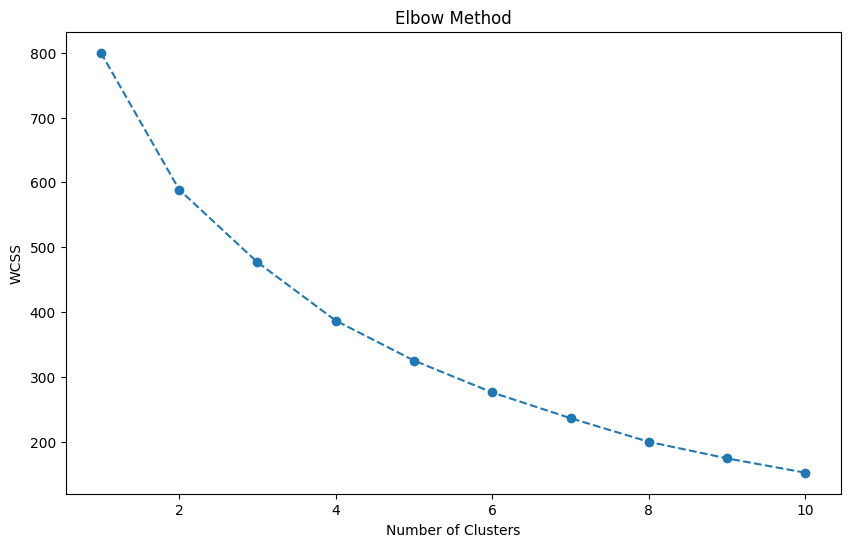

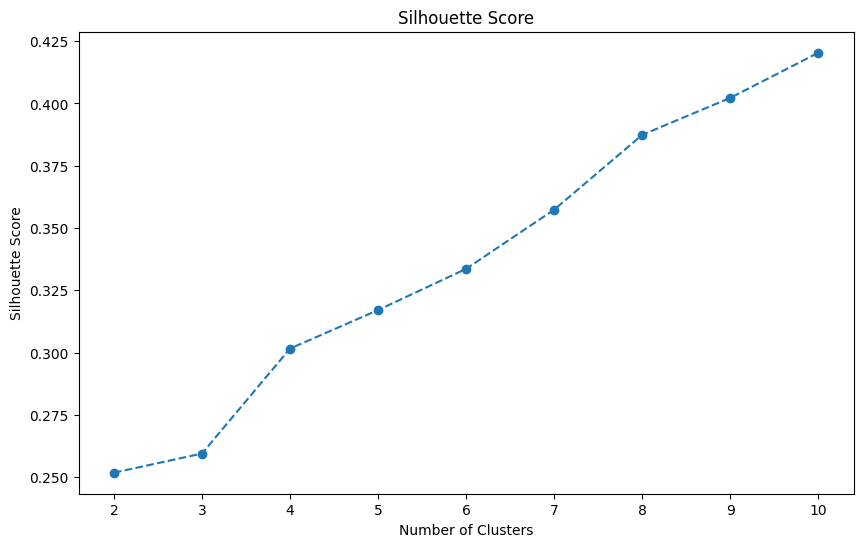

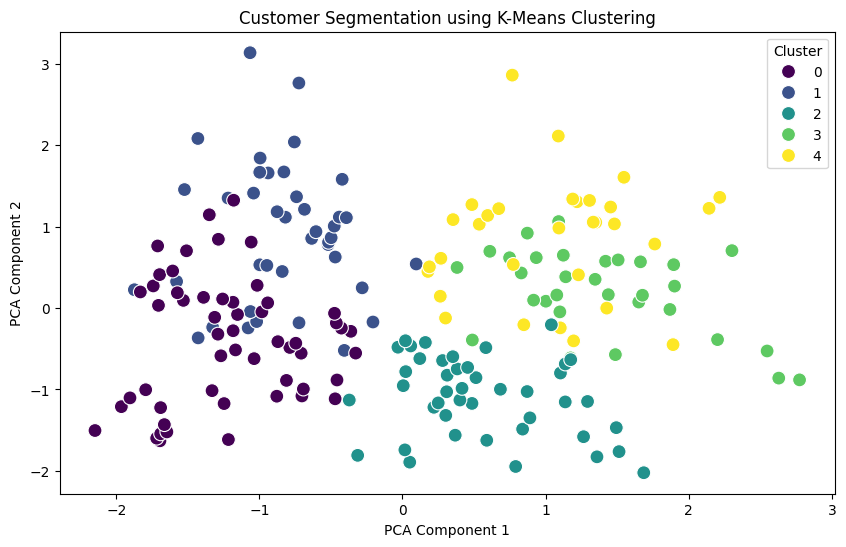

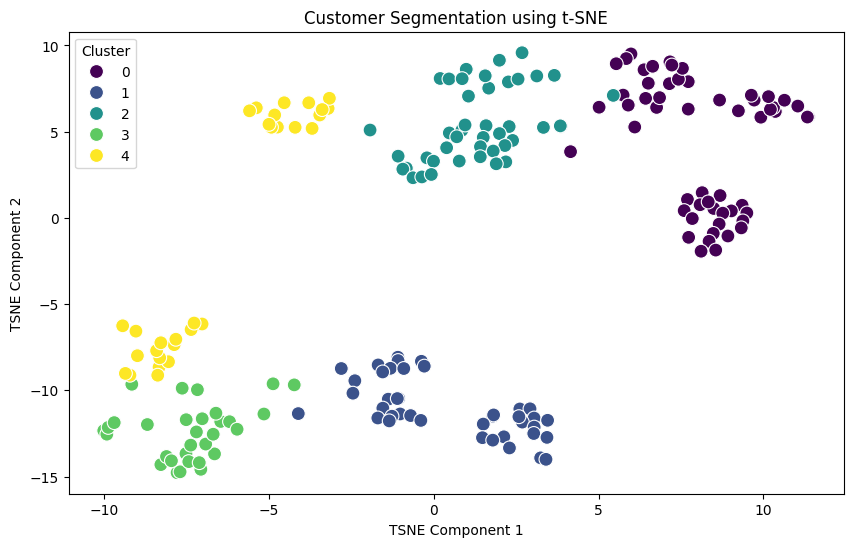

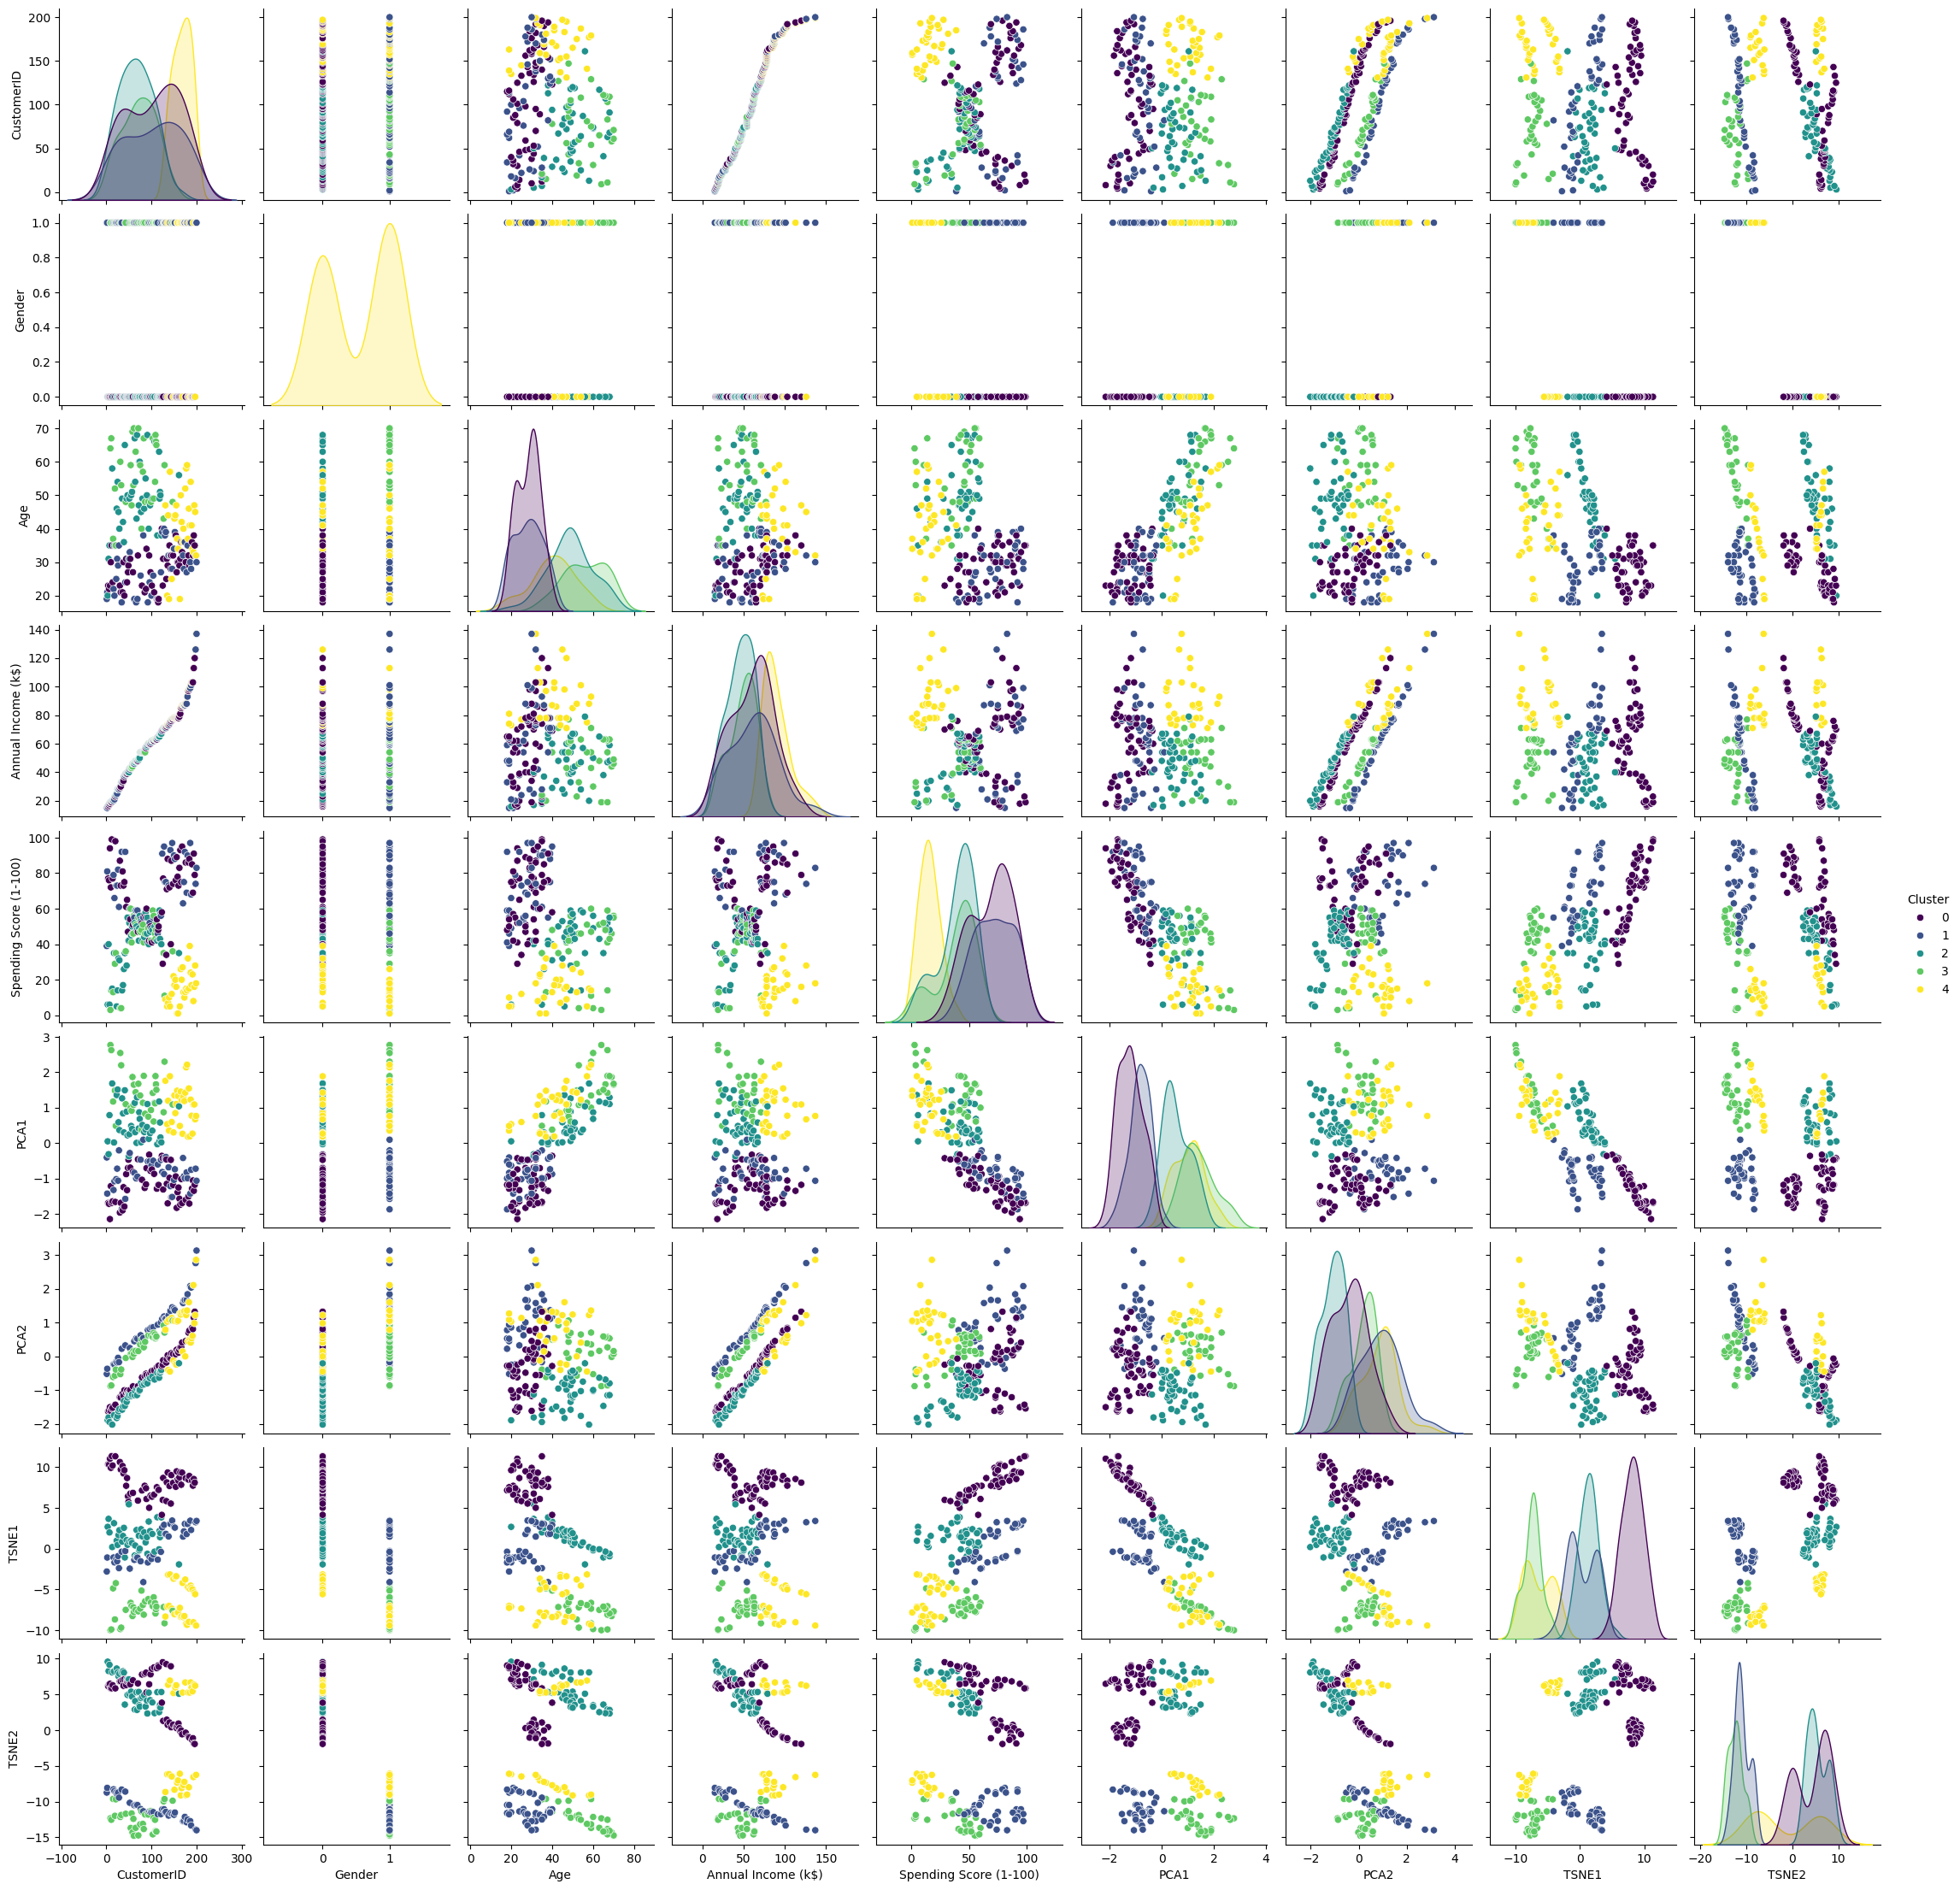

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster      PCA1      PCA2      TSNE1     TSNE2  
0        1 -0.406383 -0.520714  -2.803227 -8.735298  
1        1 -1.427673 -0.367310  -1.086103 -8.079898  
2        2  0.050761 -1.894068   2.679811  9.576847  
3        0 -1.694513 -1.631908  10.362067  6.169865  
4        2 -0.313108 -1.810483   3.658615  8.263924  
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        102.854545  0.000000  28.345455           60.800000   
1        103.375000  1.000000  28.25000

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Step 1: Load the Dataset
# Load the dataset into a DataFrame
df = pd.read_csv('C:/Users/Manoh/Downloads/archive (2)/Mall_Customers.csv')

# Inspect the dataset
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# Check column names
print("\nColumn Names:", df.columns)

# Step 2: Data Preprocessing
# Encode the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Drop unnecessary columns (e.g., CustomerID) for clustering
df_clustering = df.drop(columns=['CustomerID'])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Step 3: Clustering
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Alternatively, use the Silhouette Score to evaluate the number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the Elbow Method and Silhouette Score, choose the optimal number of clusters
optimal_clusters = 5  # Example: Choose 5 clusters based on the plots

# Apply K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Step 4: Visualization
# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot the clusters in 2D using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Alternatively, use t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)
df['TSNE1'] = df_tsne[:, 0]
df['TSNE2'] = df_tsne[:, 1]

# Plot the clusters in 2D using t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segmentation using t-SNE')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

# Pair Plots to visualize relationships between features within clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

# Step 5: Deliverables and Recommendations
# Print the clustered dataset
print(df.head())

# Insights and Recommendations
# Analyze the clusters and provide actionable insights
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Recommendations based on clusters
# Example: Identify high-spending customers, target specific age groups, etc.